In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import sys
sys.path.append("..")

In [3]:
from src import disjoint_cv

In [4]:
types_ddi = pd.read_csv('https://bitbucket.org/kaistsystemsbiology/deepddi/raw/5ebc61f08bf04cf324d12804c092c3b43c1b33c2/data/Interaction_information.csv')

In [5]:
types_ddi.head()

,Interaction type,Description,Subject,DDI type
0,67,#Drug1 can cause a decrease in the absorption ...,2,DDI_type1
1,18,#Drug1 can cause an increase in the absorption...,1,DDI_type2
2,13,The absorption of #Drug2 can be decreased when...,1,DDI_type3
3,3,The bioavailability of #Drug2 can be decreased...,1,DDI_type4
4,62,The bioavailability of #Drug2 can be increased...,1,DDI_type5


In [6]:
label_df = pd.read_csv('https://bitbucket.org/kaistsystemsbiology/deepddi/raw/5ebc61f08bf04cf324d12804c092c3b43c1b33c2/data/DrugBank_known_ddi.txt', sep='\t')

In [7]:
label_df.rename(columns={'drug1':'Drug1','drug2':'Drug2'}, inplace=True)

In [9]:
label_df.to_csv('../data/input/labeled_ddi_DBv5.0.3.csv', index=False)

In [10]:
ddi_db4_df = pd.read_csv('../data/input/ddi_v4.txt', sep='\t')
ddi_db4_df.head()

,Drug1,Drug2
0,DB00005,DB00026
1,DB00026,DB00005
2,DB00005,DB00065
3,DB00065,DB00005
4,DB00005,DB00072


In [11]:
len(ddi_db4_df)

96942

In [12]:
def swap(drug1, drug2):
    if drug1 < drug2:
        return drug1,drug2
    else:
        return drug2,drug1

In [13]:
ddis = ddi_db4_df.apply(lambda row: swap(row[0],row[1]), axis=1)
ddi_db4_df = pd.DataFrame(ddis.to_list(), columns=['Drug1','Drug2'])

In [14]:
ddi_db4_df = ddi_db4_df.drop_duplicates()

In [15]:
len(ddi_db4_df)

48471

In [16]:
ddi_db4_labeled_df = ddi_db4_df.merge(label_df, how='left', on=['Drug1','Drug2'])

In [17]:
ddi_db4_labeled_df =ddi_db4_labeled_df.dropna()

In [18]:
len(ddi_db4_labeled_df)

18262

In [19]:
len(label_df)

192284

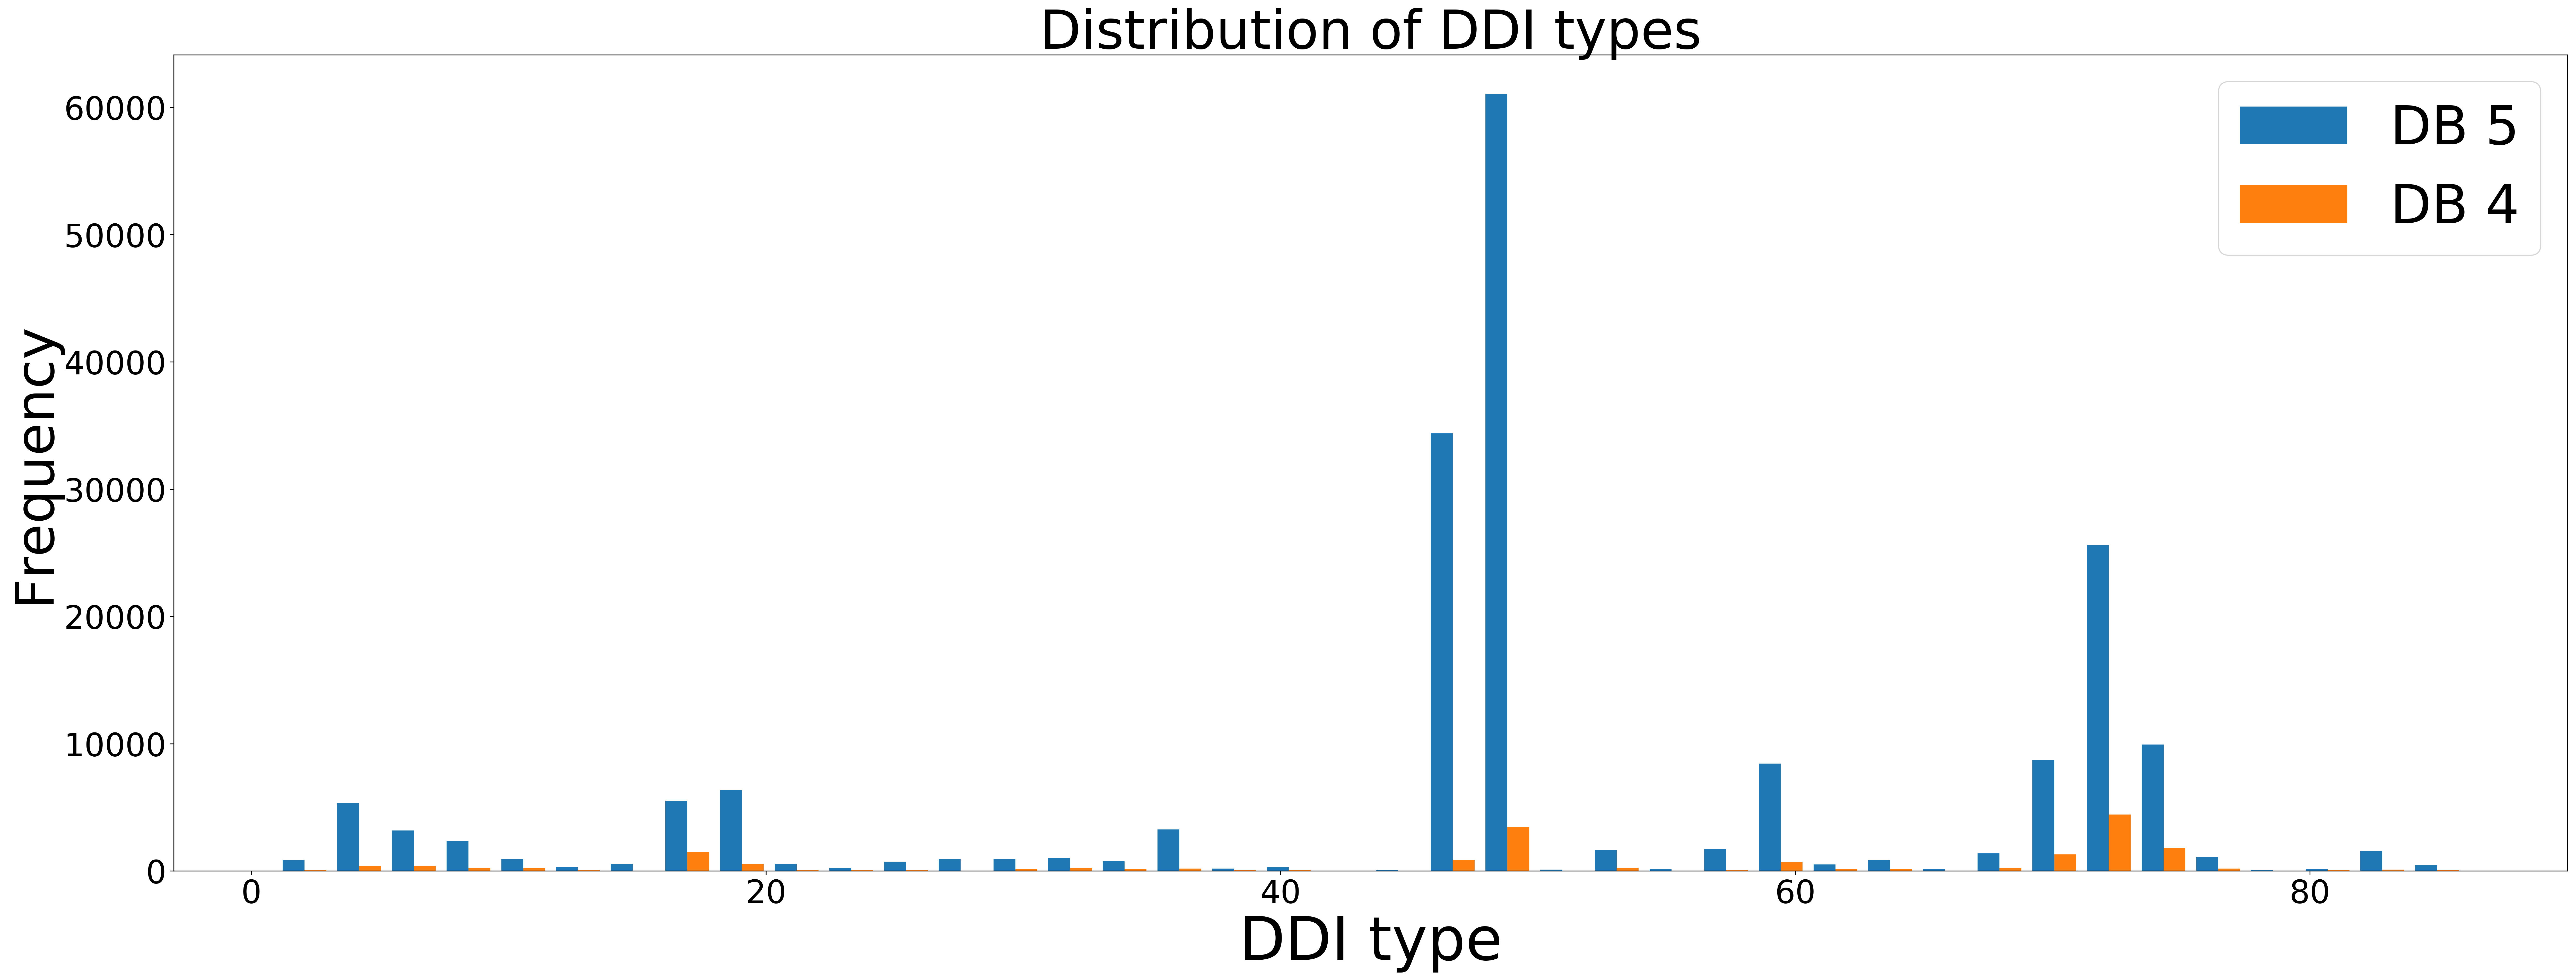

In [20]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(40,14),dpi=300)
train = label_df.Label
test = ddi_db4_labeled_df.Label
plt.hist([train, test], label=['DB 5', 'DB 4'], bins=40)
plt.title('Distribution of DDI types', fontsize=50)
plt.xlabel('DDI type', fontsize=56)
plt.xticks(fontsize=30)
plt.legend(fontsize=50)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=30)
fig.savefig('frequency.png')

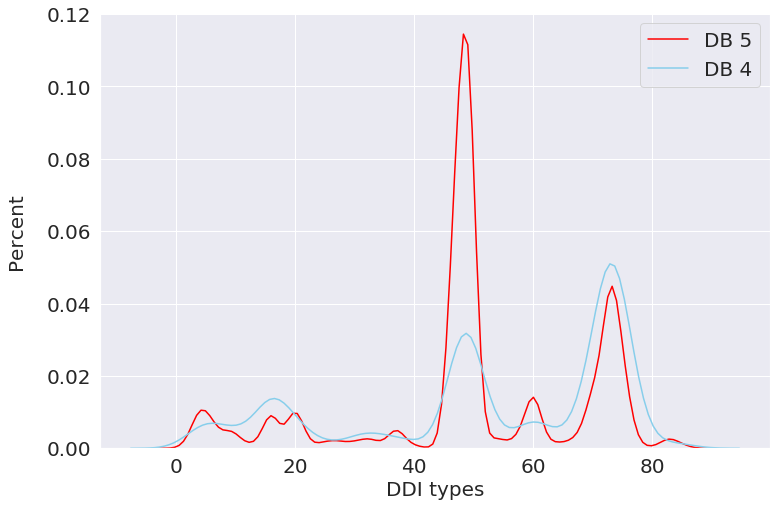

In [21]:
sns.set(rc={'figure.figsize':(12,8),'legend.fontsize': 20.0})
ax = sns.distplot( label_df.Label ,hist =False, norm_hist= True, color="red",  label="DB 5")
ax = sns.distplot( ddi_db4_labeled_df.Label, hist =False,norm_hist= True, color="skyblue", label="DB 4")
#sns.distplot( test_pairwise_df.Label, hist =False,norm_hist= True, color="green", label="Pairwise Test set")
#ax.set(xlabel='DDI types', ylabel='Percent')
ax.set_ylabel("Percent",fontsize=20)
ax.set_xlabel("DDI types",fontsize=20)
ax.yaxis.labelpad = 20
ax.tick_params(labelsize=20)
ax.figure.savefig("percent_distribution.png")